## Discrete Time Quantum Walks

### MIT iQuHACK 2020 | Team "Quantum Waddle"

This work explores the implementation of discrete-time quantum walks on a 1D and 2D chain as described in [1] using IBM's quantum computing platform. A useful tutorial referenced here can be found at [2].

### Contributors
Biswaroop Mukherjee, Carsten Robens, Maya Reese, Lamia Ateshian, Yiqi Ni, Enrique Mendez

### Introduction
Classical random walks are used widely in graph searching and optimization, with many important applications in route planning, game playing, physics, and finance. This motivates researchers to look at the quantum analogue of a random walk, a quantum walk. 

A simple random walk example consists of a 1D chain whose nodes are enumerated by integer values and connected to its two adjacent neighbors. A random walker in position $i$ steps to either $i+1$ or $i-1$ depending on the outcome of a coin flip. 

In the quantum mechanical analogue, we consider evolution of position on a lattice conditioned on the spin state of a spin-1/2 system.

<img src="random_walk.png" width=700px>

### Motivation
[MOTIVATION HERE]

### Quantum Walk on a Lattice

The state of the system evolves with the application of two unitary operators:

1. A coin flip operator
2. A conditional shift operator

The state of our system $\vert \Psi \rangle$ is the product state of the coin and the position on the lattice
$\vert \Psi \rangle = \vert s \rangle \otimes \vert \psi \rangle$.

Coin space: $\vert s \rangle \in \mathcal{H}_C = \{ \vert \uparrow \rangle, \vert \downarrow \rangle \}$

Position space: $ \vert \psi \rangle = \mathcal{H}_P = \{ \sum_{i \in Z} \alpha_i \vert i \rangle \} $

#### Hadamard coin

For a walk on a chain, the coin flip operator is a $2 \times 2$ unitary matrix. A typical choice would be the Hadamard coin,

$H = \frac{1}{\sqrt 2} \begin{bmatrix} 1 & 1\\ 1 & -1 \end{bmatrix}$

#### Shift operator

The shift operator S is a position translating operator conditioned on the coin as the control qubit. It increments the position by one if the particle is in the spin up state, and decrements by one if the particle is in the spin down state:

$ S = \sum_{i \in Z} \mid i + 1 \rangle \langle i \mid \otimes \vert \uparrow \rangle \langle \uparrow \vert + \vert i - 1 \rangle \langle i \vert \otimes \vert \downarrow \rangle \langle \downarrow \vert $

#### Single time step
If the system is initialized in the state $\vert \Psi \rangle = \vert \uparrow \rangle \otimes \vert 0 \rangle$,

a single time step involves the application of a Hadamard coin flip

$\vert \uparrow \rangle \otimes \vert 0 \rangle \xrightarrow{H} \frac{1}{\sqrt 2} \big( \vert \uparrow \rangle + \vert \downarrow \rangle \big) \otimes \vert 0 \rangle $

followed by a conditional shift

$ \xrightarrow{S} \frac{1}{\sqrt 2} \big( \vert \uparrow \rangle \otimes \vert 1 \rangle  + \vert \downarrow \rangle \otimes \vert -1 \rangle \big) $

### Quantum Cycle Graph

A 1D cycle chain of 8 nodes is represented by the following figure:
<img src="cycle_graph.png" width=400px>

A quantum walk on the cycle can be efficiently and straightforwardly implemented with a set of quantum gates consisting of Hadamard gates followed by conditional increment and decrement gates, which are described below.

In [2]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_state_city
import matplotlib.pyplot as plt

<h3><center>Increment Gate</center></h3>

<img src="increment_gate.png" width="auto">

<h3><center>Decrement Gate</center></h3>

<img src="decrement_gate.png" width="auto">

<h3><center>One time step of a Hadamard Walk</center></h3>
<img src="1step.png" width="auto">


<h3><center>1D Quantum Walk Circuit</center></h3>
<img src="1d_circuit.png" width="600px">
<h3><center>2D Quantum Walk Circuit</center></h3>
<img src="2d_circuit.png" width="600px">

In [5]:
# 1D Graph
def increment_gate(circuit, qpos, qcoin):
    n = len(qpos)
    for i in range(n):
        circuit.mct([qcoin[0]]+qpos[i+1:], qpos[i], None, mode='noancilla')
        
def decrement_gate(circuit, qpos, qcoin):
    n = len(qpos)
    circuit.x(qcoin[0])
    for i in range(n):
        if i+1 < n: circuit.x(qpos[i+1:])
        circuit.mct([qcoin[0]]+qpos[i+1:], qpos[i], None, mode='noancilla')
        if i+1 < n: circuit.x(qpos[i+1:])
            
def step(circuit, qpos, qcoin):
    circuit.h(qcoin)
    circuit.barrier()
    increment_gate(circuit, qpos, qcoin)
    circuit.barrier()
    decrement_gate(circuit, qpos, qcoin)
    circuit.barrier()

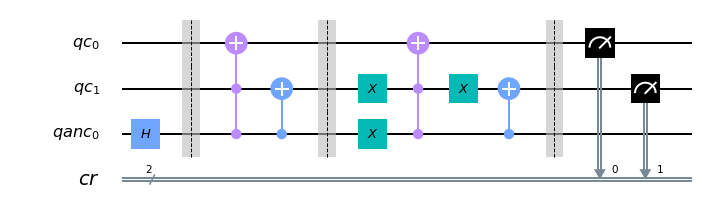

In [6]:
# Circuit drawing

n=2

qpos = QuantumRegister(n,'qc')
qcoin = QuantumRegister(1,'qanc')
cpos = ClassicalRegister(n,'cr')
circuit = QuantumCircuit(qpos, qcoin, cpos)
step(circuit, qpos, qcoin)
# # Map the quantum measurement to the classical bits
circuit.measure(qpos,cpos)

circuit.draw(output='mpl')

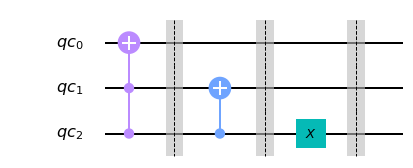

In [21]:
n=3
qpos = QuantumRegister(n,'qc')
# increment
def increment_only(circuit):
    for i in range(n):
        circuit.mct(qpos[i+1:], qpos[i], None, mode='noancilla')
        circuit.barrier()
    return circuit
# decrement
def decrement_only(circuit):
    for i in range(n):
        if i+1 < n: circuit.x(qpos[i+1:])
        circuit.mct(qpos[i+1:], qpos[i], None, mode='noancilla')
        if i+1 < n: circuit.x(qpos[i+1:])
        circuit.barrier()
            

# Increment gate
circuit = QuantumCircuit(qpos)
increment_only(circuit)
# increment_gate(circuit, qpos, qcoin)
circuit.draw(output='mpl')

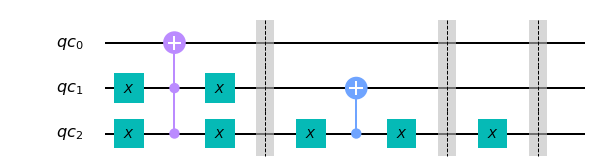

In [22]:
# Decrement gate
circuit = QuantumCircuit(qpos)
decrement_only(circuit)
# decrement_gate(circuit, qpos, qcoin)
circuit.draw(output='mpl')

## References
[1] Douglas, B. L., & Wang, J. B. (2009). Efficient quantum circuit implementation of quantum walks. Physical Review A, 79(5), 052335.

[2] Reitzner, D., Nagaj, D., & Buzek, V. (2012). Quantum walks. arXiv preprint arXiv:1207.7283.
